In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import copy
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from decompose_compose.pipeline import *
from utils.results_visualization import save_results

warnings.filterwarnings("ignore")

[Taichi] version 1.6.0, llvm 15.0.4, commit f1c6fbbd, linux, python 3.9.16


[I 12/27/23 19:52:39.553 99112] [shell.py:_shell_pop_print@23] Graphical python shell detected, using wrapped sys.stdout
/home/user/conda/envs/mpia/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Default usage from configuration file

In [3]:
default_feature_sampler_limitations = {
    'class_type': {
        'ne': 0
    },
    'main_diag_height': {
        'ge': 20
    },
    'main_diag_width': {
        'ge': 20
    }
}

In [4]:
pipeline = Pipeline(
    project_config_path='configs/basic_gpu_project_config.json',
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=1
)

pipeline.prepare()

{'device': 'cuda:0', 'composition_mode': 'modification', 'blending_mode': 'base', 'object_prefix': 'plant_', 'dataset_names': ['Tomato detection'], 'result_sizes': [[640, 640]], 'force_repreparation': False, 'augmentations_config_path': './configs/augmentation_config.py', 'background_generation': {'storage_path': './tmp_data/background_storage/', 'requires_model': True, 'samples_per_dataset': 3}, 'sampling': {'num_objects_per_image': 'random_from_data', 'object_schema_mode': 'random_from_data', 'max_parts_per_object': 10}, 'object_placement': 'uniform_2d', 'verbose': 1}
Using existing backgrounds from ./tmp_data/background_storage/


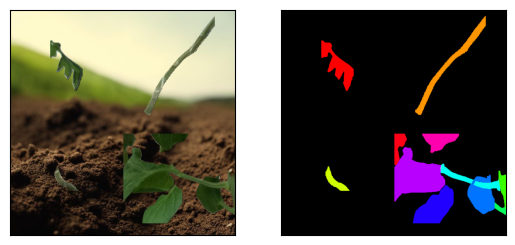

In [5]:
generated_scene, mask_part_list = pipeline.run(num_objects=4)
save_results(generated_scene, mask_part_list)

# Change config in script

In [9]:
default_config = {
    "device": "cuda:0",
    "composition_mode": "modification",
    "blending_mode": "base",
    "object_prefix": "plant_",
    "dataset_names": [
        "flower_classification"
    ],
    "result_sizes": [
        [640, 640]
    ],
    "force_repreparation": False,
    "augmentations_config_path": "./configs/augmentation_config.py",
    "background_generation": {
        "storage_path": "./tmp_data/background_storage_empty/",
        "requires_model": True,
        "samples_per_dataset": 3
    },
    "sampling": {
        "num_objects_per_image": "random_from_data",
        "object_schema_mode": "random_from_data",
        "max_parts_per_object": 15
    },
    "object_placement": "uniform_2d"
}

In [10]:
pipeline = Pipeline(
    project_config=default_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=1
)

pipeline.prepare()

{'device': 'cuda:0', 'composition_mode': 'modification', 'blending_mode': 'base', 'object_prefix': 'plant_', 'dataset_names': ['flower_classification'], 'result_sizes': [[640, 640]], 'force_repreparation': False, 'augmentations_config_path': './configs/augmentation_config.py', 'background_generation': {'storage_path': './tmp_data/background_storage_empty/', 'requires_model': True, 'samples_per_dataset': 3}, 'sampling': {'num_objects_per_image': 'random_from_data', 'object_schema_mode': 'random_from_data', 'max_parts_per_object': 15}, 'object_placement': 'uniform_2d', 'verbose': 1}
Using existing backgrounds from ./tmp_data/background_storage_empty/


Upscaling image with R-ESRGAN


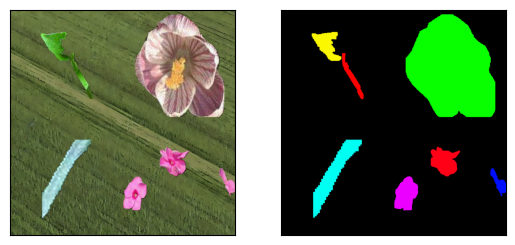

In [11]:
generated_scene, mask_part_list = pipeline.run(num_objects=4)
save_results(generated_scene, mask_part_list)

# Poisson blending

In [17]:
new_config = copy.deepcopy(default_config)
new_config['dataset_names'] = ['fruit_plants']
new_config['blending_mode'] = 'poisson'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=1
)

pipeline.prepare()

{'device': 'cuda:0', 'composition_mode': 'modification', 'blending_mode': 'poisson', 'object_prefix': 'plant_', 'dataset_names': ['fruit_plants'], 'result_sizes': [[640, 640]], 'force_repreparation': False, 'augmentations_config_path': './configs/augmentation_config.py', 'background_generation': {'storage_path': './tmp_data/background_storage_empty/', 'requires_model': True, 'samples_per_dataset': 3}, 'sampling': {'num_objects_per_image': 'random_from_data', 'object_schema_mode': 'random_from_data', 'max_parts_per_object': 15}, 'object_placement': 'uniform_2d', 'verbose': 1}


100%|██████████| 50/50 [00:10<00:00,  4.66it/s]


Upscaling image with R-ESRGAN
[Taichi] Starting on arch=cuda


[W 12/28/23 02:53:19.939 99112] [offload.cpp:emit_struct_for@237] Specified block dim 1024 is bigger than SNode element size 64. Clipping.

[W 12/28/23 02:53:20.151 99112] [offload.cpp:emit_struct_for@237] Specified block dim 1024 is bigger than SNode element size 64. Clipping.

[W 12/28/23 02:53:20.151 99112] [offload.cpp:emit_struct_for@237] Specified block dim 1024 is bigger than SNode element size 3. Clipping.



[Taichi] Starting on arch=cuda


[W 12/28/23 02:53:33.904 99112] [offload.cpp:emit_struct_for@237] Specified block dim 1024 is bigger than SNode element size 64. Clipping.

[W 12/28/23 02:53:34.077 99112] [offload.cpp:emit_struct_for@237] Specified block dim 1024 is bigger than SNode element size 64. Clipping.

[W 12/28/23 02:53:34.077 99112] [offload.cpp:emit_struct_for@237] Specified block dim 1024 is bigger than SNode element size 3. Clipping.



[Taichi] Starting on arch=cuda


[W 12/28/23 02:54:02.194 99112] [offload.cpp:emit_struct_for@237] Specified block dim 1024 is bigger than SNode element size 64. Clipping.

[W 12/28/23 02:54:02.368 99112] [offload.cpp:emit_struct_for@237] Specified block dim 1024 is bigger than SNode element size 64. Clipping.

[W 12/28/23 02:54:02.368 99112] [offload.cpp:emit_struct_for@237] Specified block dim 1024 is bigger than SNode element size 3. Clipping.



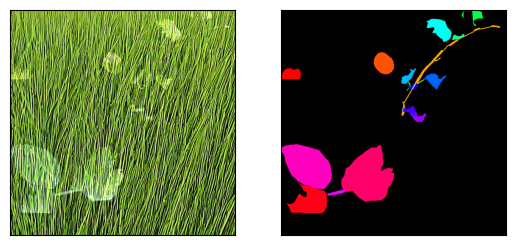

In [ ]:
generated_scene, mask_part_list = pipeline.run(num_objects=3)
save_results(generated_scene, mask_part_list)